In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv("Project_survey.csv")
df.columns = ["ts","age","gender","location","prof","income",
              "covidaff","vaccine","fin_aff","phy_aff","men_aff","comorb","ex_fq","pov_ex","trv_work",
              "trv_emrg","trv_vaca","cov_prec","aff_cov_wrklf","change_pf","focus_ph","focus_mh","focus_fin"]
df1 = df.drop("ts",axis=1)
df1.age = pd.to_numeric(df1.age,errors = "coerce").astype(pd.Int16Dtype())
df1.prof = df1.prof.str.lower()
df1["prof"].replace(to_replace = ["student", "student ", "nursing", "studying", "nursing student", "medical student", "mba student", "graphic designer", "completed bachelors, studying for cfa ", "design student ", "college student", "mbbs", "bsc nursing", "students ", "nursing students", "b.sc nursing", "b. sc nursing", "students ", "bsc nursing ", "nursing ", "students"], value = "student", inplace = True)
df1["prof"].replace(to_replace = ["service", "production engineer", "engineer", "it professional", "government servant", "employee in private company", "job at it", "graduate", "software developer", "private sector (business)", "educator ", "job", "it specialist", "marketing", "athlete/accountant", "doctor", "private ", "sales executive ", "trader", "private job", "graduate engineer", "government service", "govt employee", "gorvenment servant", "government", "digital creator, photografer, baker", "business", "government job", "insurance advisor", "government officer", "govt job", "pvt job ", "pvt  job", "govt service", "president", "executive ", "govt servant ", "self employed", "govt. service", "professor in pharmacy", "government employee", "advocate ", "govt servent ", "govt servant", "doctor ", "serving ", "teacher", "self employment", "government job ", "govt. service ", "data scientist", "executive in supply chain management ", "govt.employee", "government service ", "it", "corporate professional", "govt. servant ", "central government services ", "service ", "govt officer", "print media employee ", "physiotherapist", "hardware engineer", "officer", "invigilator for idp", "teaching", "nurse", "assistant manager", "agriculture", "job ", "nursing tutor", "govt. servant", "pvt job"], value = "employed", inplace = True)
df1["prof"].replace(to_replace = ["retired govt service", "retd ongc officer", "retired", "retired ", "home maker", "retired from ongc ", "household", "retired government servant", "house manager ", "housewife ", "house wife", "no", "un employees", "housewife"], value = "unemployed", inplace = True)
df1["gender"] = df1["gender"].fillna("Prefer not to say")
df1 = df1[df1["age"].notna()]
df1['age_grp'] = pd.cut(df1.age,5)

In [3]:
df2 = df1.copy(deep = True)
df2["gender"].replace(to_replace = ["Male", "Female", "Prefer not to say"], value = 1, inplace = True)
df1["gender1"] = df2["gender"]

In [4]:
df1

,age,gender,location,prof,income,covidaff,vaccine,fin_aff,phy_aff,men_aff,...,trv_emrg,trv_vaca,cov_prec,aff_cov_wrklf,change_pf,focus_ph,focus_mh,focus_fin,age_grp,gender1
0,25,Male,Gurgaon,employed,70000-100000,"Yes, I had symptoms and was detected positive",Yes only 1st dose,Slightly affected,Moderately affected,Moderately affected,...,Rarely,Rarely,Wearing mask whenever going out;Always carryin...,4,No,Moderate,Moderate,Moderate,"(16.952, 26.6]",1
1,25,Male,Ahmedabad,student,70000-100000,"Yes, I had symptoms and was detected positive",Yes completed both dose,Not affected,Slightly affected,Very much affected,...,Rarely,Rarely,Wearing mask whenever going out,3,No,Very less,Moderate,Moderate,"(16.952, 26.6]",1
2,24,Male,Kolkata,student,30000-50000,"No, I had symptoms of covid but never tested",Yes completed both dose,Moderately affected,Not affected,Not affected,...,Rarely,Frequently,Wearing mask whenever going out;Always carryin...,4,No,Moderate,Moderate,Moderate,"(16.952, 26.6]",1
3,24,Male,Gurgaon,employed,50000-70000,"No, I had covid related symptoms but was teste...",Yes completed both dose,Slightly affected,Very much affected,Severely affected,...,Rarely,Rarely,Wearing mask whenever going out;Always carryin...,7,No,Very much,Very much,Moderate,"(16.952, 26.6]",1
4,24,Male,Kolkata,employed,10000-30000,No I never had symptoms of covid,Yes completed both dose,Very much affected,Very much affected,Severely affected,...,Frequently,Rarely,Wearing mask whenever going out;Always carryin...,7,No,Very less,Very less,Moderate,"(16.952, 26.6]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,34,Male,Pilibhit,unemployed,less than 10000,No I never had symptoms of covid,Yes completed both dose,Slightly affected,Not affected,Not affected,...,Rarely,Rarely,Wearing mask whenever going out;Always carryin...,2,Lost the job,Very less,Very less,Moderate,"(26.6, 36.2]",1
217,20,Female,Rudrapur,student,less than 10000,No I never had symptoms of covid,Yes only 1st dose,Moderately affected,Not affected,Slightly affected,...,Rarely,Rarely,Always carrying sanitizer whenever going out,7,No,Moderate,Very less,Very much,"(16.952, 26.6]",1
218,21,Female,Sagar,student,less than 10000,No I never had symptoms of covid,Yes completed both dose,Slightly affected,Not affected,Slightly affected,...,Rarely,Rarely,Wearing mask whenever going out;Always carryin...,1,No,Very much,Very much,Very much,"(16.952, 26.6]",1
220,28,Female,Haldwani,employed,less than 10000,"No, I had covid related symptoms but was teste...",Yes completed both dose,Slightly affected,Slightly affected,Slightly affected,...,Rarely,Rarely,Wearing mask whenever going out;Always carryin...,5,No,Moderate,Moderate,Moderate,"(26.6, 36.2]",1


In [5]:
df1.shape[0]

202

In [6]:
def myfun(df=df1,x='income',y='fin_aff',xlabel = "income group", ylabel ="percentage",rot = 0):
    df_age = pd.concat([df1[x],df1[y].str.get_dummies()],axis=1)
    p = df_age.groupby(x).aggregate(sum)
    df123 = pd.DataFrame(pd.value_counts(df1[x]))
    g = p.div(df123[x],axis=0)
    f = plt.figure()
    x = [0.6,0.8,1,1.2,1.4]
    y = np.array([0,0.1,0.2,0.3,0.4,0.5,0.6])
    width = 0.2
    clrs = ["cyan","green","yellow","red","black"]
    da = len(g.index)
    for i in range(len(g.columns)):
        l = np.arange(x[i],x[i]+1.4*(da),1.5)
        plt.bar(l,g[g.columns[i]],width,color =clrs[i])
    plt.xticks(np.arange(1,1+1.5*len(g.index),1.5),list(g.index),rotation = rot)
    plt.yticks(y,["0%","10%","20%","30%","40%","50%","60%"])
    plt.legend(list(g.columns), loc = "best")
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

In [9]:
plt.bar?

In [7]:
df1.columns

Index(['age', 'gender', 'location', 'prof', 'income', 'covidaff', 'vaccine',
       'fin_aff', 'phy_aff', 'men_aff', 'comorb', 'ex_fq', 'pov_ex',
       'trv_work', 'trv_emrg', 'trv_vaca', 'cov_prec', 'aff_cov_wrklf',
       'change_pf', 'focus_ph', 'focus_mh', 'focus_fin', 'age_grp', 'gender1'],
      dtype='object')

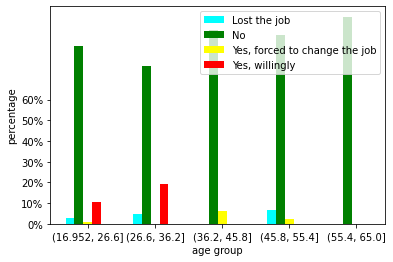

In [8]:
myfun(x = "age_grp",y = "change_pf",xlabel = "age group")

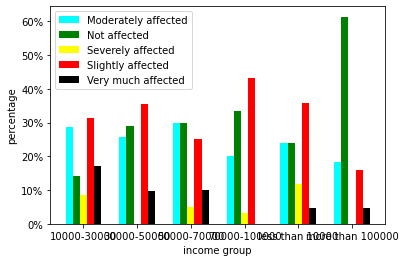

In [9]:
myfun(x = "income",y = "fin_aff" )

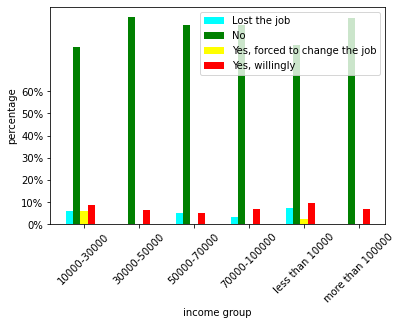

In [10]:
myfun(x = "income",y = "change_pf",rot = 45)

In [ ]:
myfun(x = "income",y = "aff_cov_wrklf")#####income group vs work life

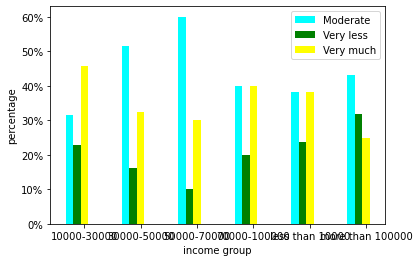

In [11]:
myfun(x = "income",y = "focus_fin")

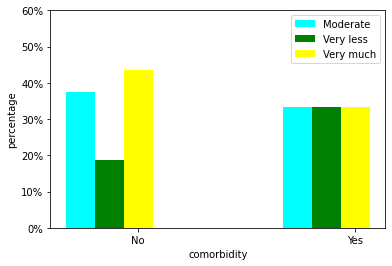

In [12]:
myfun(x = "comorb",y = "focus_ph",xlabel = "comorbidity")

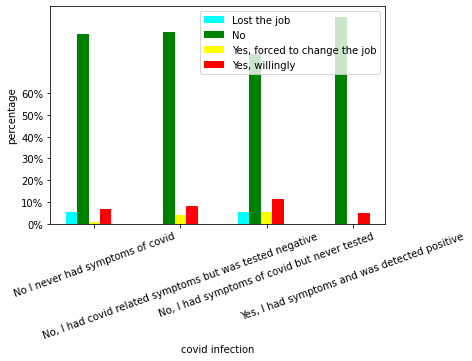

In [13]:
myfun(x = "covidaff",y = "change_pf",xlabel = "covid infection",rot = 20)

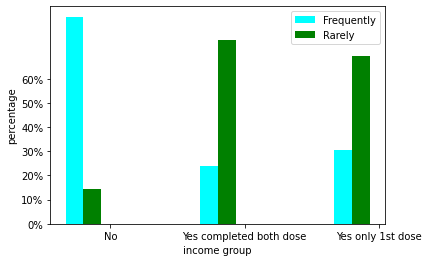

In [14]:
myfun(x = "vaccine",y = "trv_vaca")

Text(0.5, 1.0, 'Vaccination status vs Precautions taken')

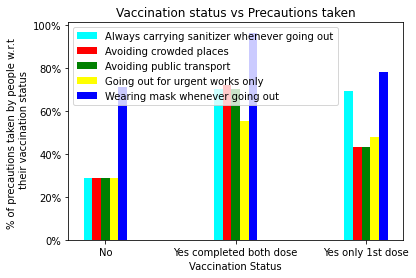

In [15]:
###########vaccination vs precautions taken
df_vaccine_pr = pd.concat([df1.vaccine, df1.cov_prec.str.get_dummies(sep = ";")], axis = 1)
p9 = df_vaccine_pr.groupby("vaccine").aggregate(sum)
dd = df1["cov_prec"].str.get_dummies(sep = ";")
df1_9 = pd.DataFrame(pd.value_counts(df1.vaccine))
g9 = p9.div(df1_9["vaccine"], axis = 0)


f9 = plt.figure()
x9 = np.array([1,4,7])
y9 = np.array([0, 0.2, 0.4, 0.6, 0.8, 1])
width = 0.2
plt.bar(x9 - 0.4, g9["Always carrying sanitizer whenever going out"], width, color = "cyan")
plt.bar(x9 - 0.2, g9["Avoiding crowded places"], width, color = "red")
plt.bar(x9, g9["Avoiding public transport"], width, color = "green")
plt.bar(x9 + 0.2, g9["Going out for urgent works only"], width, color = "yellow")
plt.bar(x9 + 0.4, g9["Wearing mask whenever going out"], width, color = "blue")
plt.xticks(x9, list(g9.index))
plt.yticks(y9, ["0%", "20%", "40%", "60%", "80%", "100%"])
plt.legend(g9.columns, loc = "best")
plt.xlabel("Vaccination Status")
plt.ylabel("% of precautions taken by people w.r.t \n their vaccination status")
plt.title("Vaccination status vs Precautions taken")

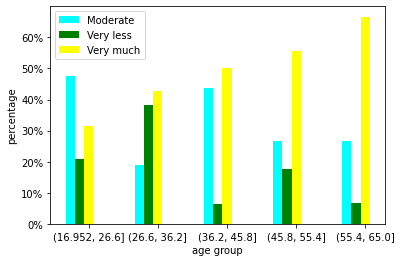

In [16]:
myfun(x = "age_grp",y = "focus_ph",xlabel = "age group")

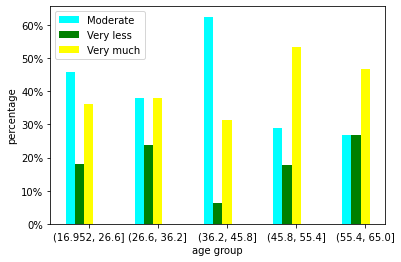

In [17]:
myfun(x = "age_grp",y = "focus_mh",xlabel = "age group")

Text(0.5, 1.0, 'Covid status vs Precautions taken')

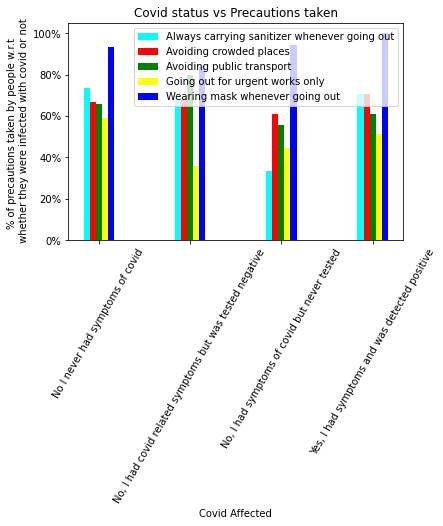

In [18]:
#######taking precautions vs covid infection
df_covid_pr = pd.concat([df1.covidaff, df1.cov_prec.str.get_dummies(sep = ";")], axis = 1)
p10 = df_covid_pr.groupby("covidaff").aggregate(sum)
df1_10 = pd.DataFrame(pd.value_counts(df1.covidaff))
g10 = p10.div(df1_10["covidaff"], axis = 0)


f10 = plt.figure()
x10 = np.array([1,4,7,10])
y10 = np.array([0, 0.2, 0.4, 0.6, 0.8, 1])
width = 0.2
plt.bar(x10 - 0.4, g10["Always carrying sanitizer whenever going out"], width, color = "cyan")
plt.bar(x10 - 0.2, g10["Avoiding crowded places"], width, color = "red")
plt.bar(x10, g10["Avoiding public transport"], width, color = "green")
plt.bar(x10 + 0.2, g10["Going out for urgent works only"], width, color = "yellow")
plt.bar(x10 + 0.4, g10["Wearing mask whenever going out"], width, color = "blue")
plt.xticks(x10, list(g10.index), rotation = 60)
plt.yticks(y10, ["0%", "20%", "40%", "60%", "80%", "100%"])
plt.legend(g10.columns, loc = "best")
plt.xlabel("Covid Affected")
plt.ylabel("% of precautions taken by people w.r.t \n whether they were infected with covid or not")
plt.title("Covid status vs Precautions taken")

Text(0.5, 1.0, 'Work Travel vs Precautions taken')

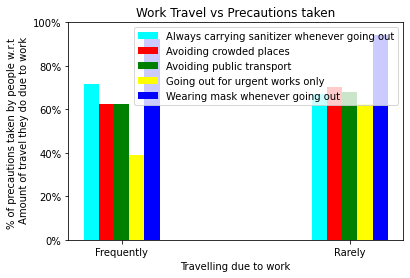

In [19]:
########taking precautions while going out for work
df_work_pr = pd.concat([df1.trv_work, df1.cov_prec.str.get_dummies(sep = ";")], axis = 1)
p11 = df_work_pr.groupby("trv_work").aggregate(sum)
df1_11 = pd.DataFrame(pd.value_counts(df1.trv_work))
g11 = p11.div(df1_11["trv_work"], axis = 0)

f11 = plt.figure()
x11 = np.array([1,4])
y11 = np.array([0, 0.2, 0.4, 0.6, 0.8, 1])
width = 0.2
plt.bar(x11 - 0.4, g11["Always carrying sanitizer whenever going out"], width, color = "cyan")
plt.bar(x11 - 0.2, g11["Avoiding crowded places"], width, color = "red")
plt.bar(x11, g11["Avoiding public transport"], width, color = "green")
plt.bar(x11 + 0.2, g11["Going out for urgent works only"], width, color = "yellow")
plt.bar(x11 + 0.4, g11["Wearing mask whenever going out"], width, color = "blue")
plt.xticks(x11, list(g11.index))
plt.yticks(y11, ["0%", "20%", "40%", "60%", "80%", "100%"])
plt.legend(g11.columns, loc = "best")
plt.xlabel("Travelling due to work")
plt.ylabel("% of precautions taken by people w.r.t \n Amount of travel they do due to work")
plt.title("Work Travel vs Precautions taken")

Text(0.5, 1.0, 'Vacation Travel vs Precautions taken')

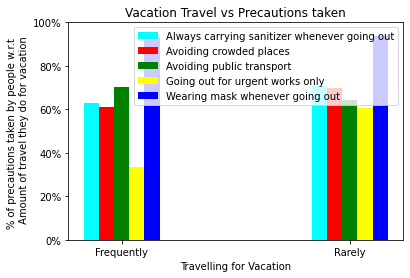

In [20]:
########taking precautions while going out for vacation
df_vaca_pr = pd.concat([df1.trv_vaca, df1.cov_prec.str.get_dummies(sep = ";")], axis = 1)
p12 = df_vaca_pr.groupby("trv_vaca").aggregate(sum)
df1_12 = pd.DataFrame(pd.value_counts(df1.trv_vaca))
g12 = p12.div(df1_12["trv_vaca"], axis = 0)

f12 = plt.figure()
x12 = np.array([1,4])
y12 = np.array([0, 0.2, 0.4, 0.6, 0.8, 1])
width = 0.2
plt.bar(x12 - 0.4, g12["Always carrying sanitizer whenever going out"], width, color = "cyan")
plt.bar(x12 - 0.2, g12["Avoiding crowded places"], width, color = "red")
plt.bar(x12, g12["Avoiding public transport"], width, color = "green")
plt.bar(x12 + 0.2, g12["Going out for urgent works only"], width, color = "yellow")
plt.bar(x12 + 0.4, g12["Wearing mask whenever going out"], width, color = "blue")
plt.xticks(x12, list(g12.index))
plt.yticks(y12, ["0%", "20%", "40%", "60%", "80%", "100%"])
plt.legend(g12.columns, loc = "best")
plt.xlabel("Travelling for Vacation")
plt.ylabel("% of precautions taken by people w.r.t \n Amount of travel they do for vacation")
plt.title("Vacation Travel vs Precautions taken")

Text(0.5, 1.0, 'Emergency Travel vs Precautions taken')

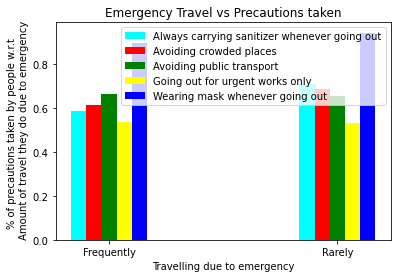

In [21]:
########taking precautions while going out for emergency
df_emrg_pr = pd.concat([df1.trv_emrg, df1.cov_prec.str.get_dummies(sep = ";")], axis = 1)
p12 = df_emrg_pr.groupby("trv_emrg").aggregate(sum)
df1_12 = pd.DataFrame(pd.value_counts(df1.trv_emrg))
g12 = p12.div(df1_12["trv_emrg"], axis = 0)

f12 = plt.figure()
x12 = np.array([1,4])
#y12 = np.array([0, 0.2, 0.4, 0.6, 0.8, 1])
width = 0.2
plt.bar(x12 - 0.4, g12["Always carrying sanitizer whenever going out"], width, color = "cyan")
plt.bar(x12 - 0.2, g12["Avoiding crowded places"], width, color = "red")
plt.bar(x12, g12["Avoiding public transport"], width, color = "green")
plt.bar(x12 + 0.2, g12["Going out for urgent works only"], width, color = "yellow")
plt.bar(x12 + 0.4, g12["Wearing mask whenever going out"], width, color = "blue")
plt.xticks(x12, list(g12.index))
#plt.yticks(y12, ["0%", "20%", "40%", "60%", "80%", "100%"])
plt.legend(g12.columns, loc = "best")
plt.xlabel("Travelling due to emergency")
plt.ylabel("% of precautions taken by people w.r.t \n Amount of travel they do due to emergency")
plt.title("Emergency Travel vs Precautions taken")

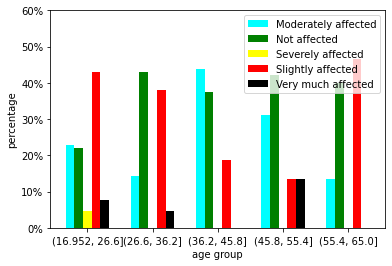

In [22]:
myfun(x = "age_grp",y = "phy_aff",xlabel = "age group")

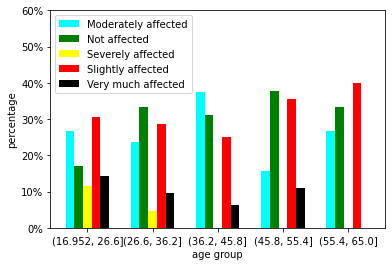

In [23]:
myfun(x = "age_grp",y = "men_aff",xlabel = "age group")

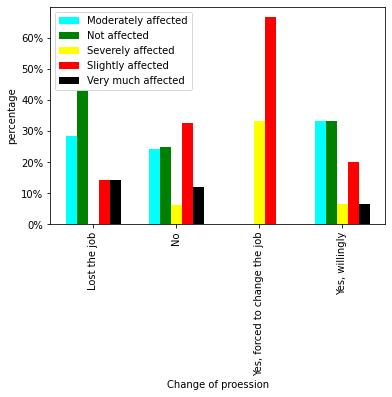

In [24]:
myfun(x = "change_pf",y = "men_aff",xlabel = "Change of proession",rot = 90)

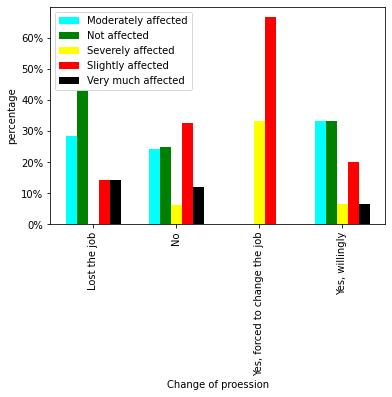

In [25]:
myfun(x = "change_pf",y = "men_aff",xlabel = "Change of proession",rot = 90)

Text(0.5, 1.0, '% of people affected with covid')

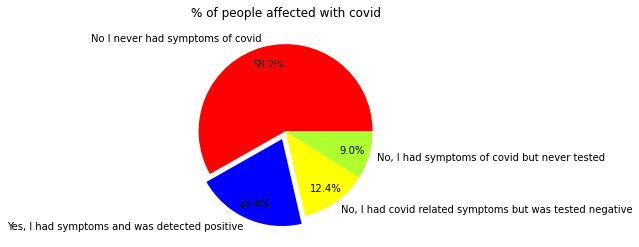

In [26]:
#####people affected with covid
df1_7 = pd.DataFrame(pd.value_counts(df1.covidaff))
colors = ['#FF0000', '#0000FF', '#FFFF00', '#ADFF2F']
explode = [0, 0.1, 0, 0]

plt.pie(df1_7.covidaff, colors = colors, labels = df1_7.index,
       autopct = '%1.1f%%', pctdistance = 0.8,
       explode = explode)
plt.title("% of people affected with covid")

Text(0.5, 1.0, '% of people forcefully lost or change the job')

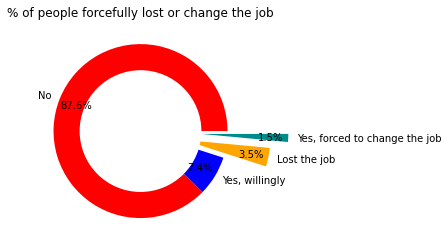

In [27]:
#######percentage of people lost their job
df1_7_1 = pd.DataFrame(pd.value_counts(df1.change_pf))
f7_2 = plt.figure()
colors = ['#FF0000', '#0000FF', '#FFA500', "#008B8B"]
explode = [0, 0, 0.5, 0.7]

plt.pie(df1_7_1.change_pf, colors = colors, labels = df1_7_1.index,
       autopct = '%1.1f%%', pctdistance = 0.8,
       explode = explode)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("% of people forcefully lost or change the job")

Text(0.5, 1.0, 'Vaccination status')

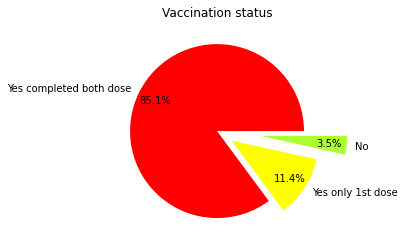

In [28]:
##############Vaccination status
df1_8 = pd.DataFrame(pd.value_counts(df1.vaccine))
colors = ['#FF0000', '#FFFF00', '#ADFF2F']
explode = [0, 0.2, 0.5]

plt.pie(df1_8.vaccine, colors = colors, labels = df1_8.index,
       autopct = '%1.1f%%', pctdistance = 0.8,
       explode = explode)
plt.title("Vaccination status")

# Covid Infected Male Female Donut Plot

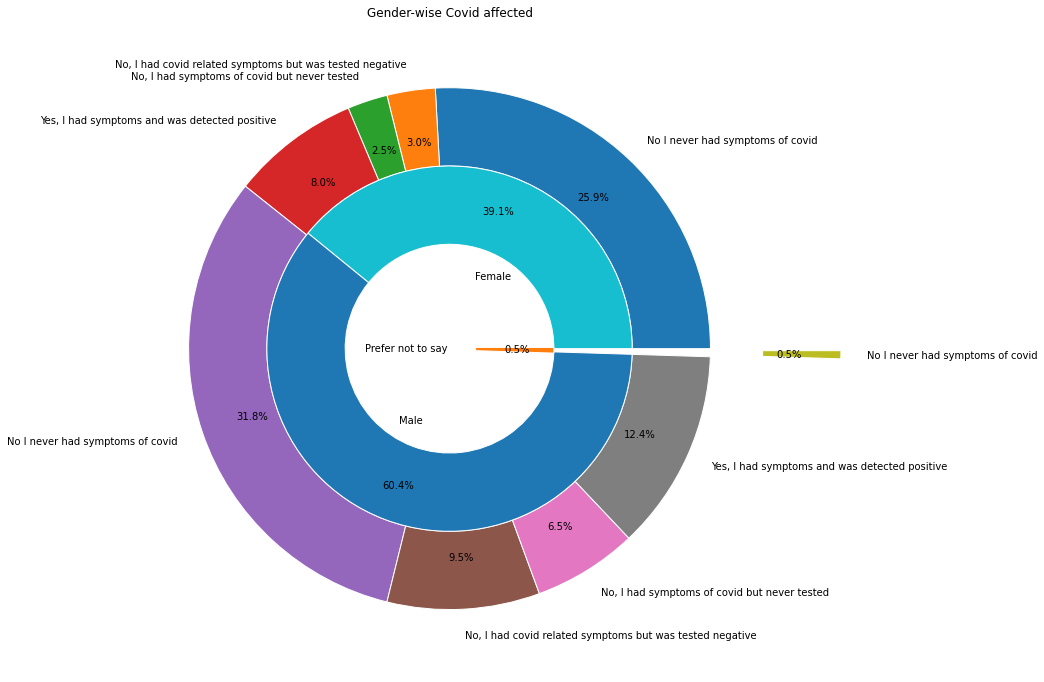

In [29]:
outer1 = df1.groupby(["gender", "covidaff"]).sum()
outer1 = outer1.drop(["age", "aff_cov_wrklf"], axis = 1)
outer1.columns = ["Count"]

inner1 = df1.groupby("gender").sum()
inner1 = inner1.drop(["age", "aff_cov_wrklf"], axis = 1)
inner1.columns = ["Count"]

outer_labels = outer1.index.get_level_values(1)

fig, ax = plt.subplots(figsize=(24,12))
size = 0.3

ax.pie(outer1.values.flatten(), radius=1,
       labels= outer_labels,
       autopct='%1.1f%%', pctdistance = 0.8, explode = [0,0,0,0,0,0,0,0,0.5],
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(inner1.values.flatten(), radius=1-size, 
       labels = inner1.index, autopct = "%1.1f%%", pctdistance = 0.8, labeldistance = 0.42, explode = [0,0,-0.3],
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title="Gender-wise Covid affected")
plt.show()

# Gender-wise Income Distribution Donut Plot

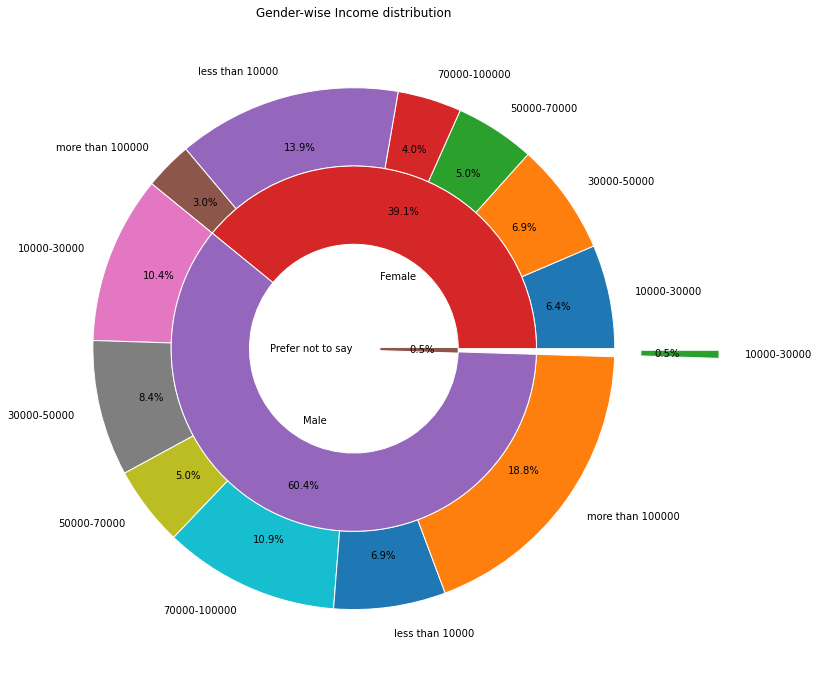

In [31]:
outer2 = df1.groupby(["gender", "income"]).sum()
outer2 = outer2.drop(["age", "aff_cov_wrklf"], axis = 1)
outer2.columns = ["Count"]

inner2 = df1.groupby("gender").sum()
inner2 = inner2.drop(["age", "aff_cov_wrklf"], axis = 1)
inner2.columns = ["Count"]

outer_labels2 = outer2.index.get_level_values(1)

fig, ax = plt.subplots(figsize=(24,12))
size = 0.3

ax.pie(outer2.values.flatten(), radius=1,
       labels= outer_labels2, explode = [0,0,0,0,0,0,0,0,0,0,0,0,0.4],
       autopct='%1.1f%%', pctdistance = 0.8,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(inner2.values.flatten(), radius=1-size, 
       labels = inner2.index, autopct = "%1.1f%%", pctdistance = 0.8, labeldistance = 0.42, explode = [0,0,-0.3],
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title="Gender-wise Income distribution")
plt.show()

# Genderwise Change in jobs 

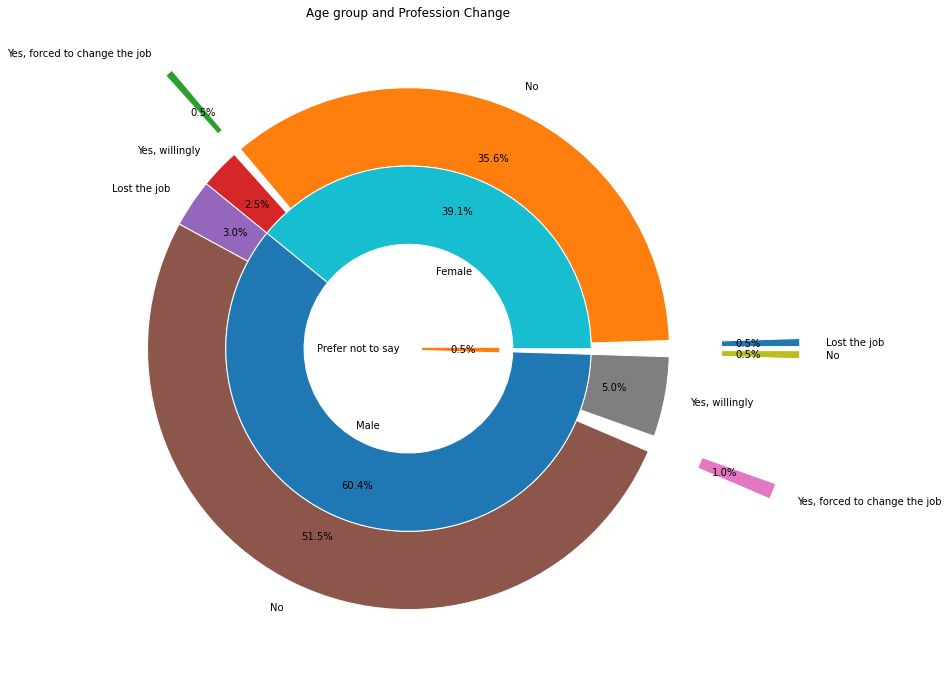

In [32]:
outer4 = df1.groupby(["gender", "change_pf"]).sum()
outer4 = outer4.drop(["age", "aff_cov_wrklf"], axis = 1)
outer4.columns = ["Count"]

inner4 = df1.groupby("gender").sum()
inner4 = inner4.drop(["age", "aff_cov_wrklf"], axis = 1)
inner4.columns = ["Count"]

fig, ax = plt.subplots(figsize = (24,12))
size = 0.3

ax.pie(outer4.values.flatten(), radius = 1,
      labels = outer4.index.get_level_values(1), autopct = "%1.1f%%", pctdistance = 0.8, explode = [0.5,0,0.4,0,0,0,0.5,0,0.5],
      wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(inner4.values.flatten(), radius = 1-size,
      labels = inner4.index, pctdistance = 0.8, autopct = "%1.1f%%", labeldistance = 0.45, explode = [0,0,-0.35],
      wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title="Age group and Profession Change")
plt.show()